In [1]:

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import utils.analyze_load_utils
import utils.analyze_utils

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import importlib

# EXPERIMENT CONFIGURATION

In [2]:
BASE = 'MAZE'
ENV = "Maze5-v0" 
FRIENDLY_ENV = "MAZE 5" 
ER_SAMPLES_NUMBER_LIST = ['3-ER', '3-EER', '3-EER_reward', '3-EER_reward-unique']
EXPERIMENT_NAME = "Maze5_PER_EXP10"

In [3]:
importlib.reload(utils.analyze_load_utils)
loader = utils.analyze_load_utils.Loader(BASE, EXPERIMENT_NAME, ENV, M = ER_SAMPLES_NUMBER_LIST)
acs2_data, acs2er_data, acs2_data_full, acs2er_data_full = loader.load()

In [4]:
importlib.reload(utils.analyze_utils)
config = utils.analyze_utils.AnalyzerConfiguration(
  BASE_NAME=BASE, 
  EXP_NAME=EXPERIMENT_NAME,
  ENV_NAME=ENV,
  FRIENDLY_ENV_NAME=FRIENDLY_ENV,
  M=ER_SAMPLES_NUMBER_LIST,
  DATA_BASE_PATH=BASE)
analyzer = utils.analyze_utils.Analyzer(acs2_data, acs2er_data, config, acs2_data_full, acs2er_data_full)

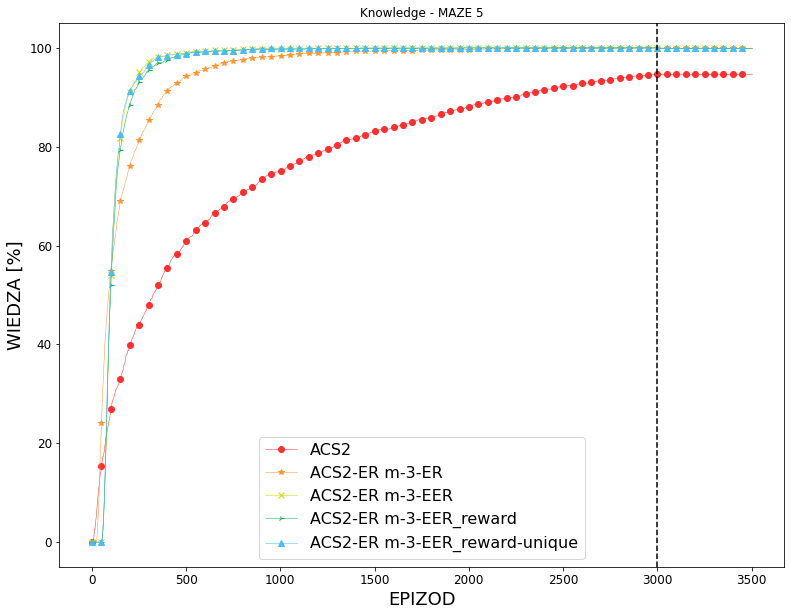

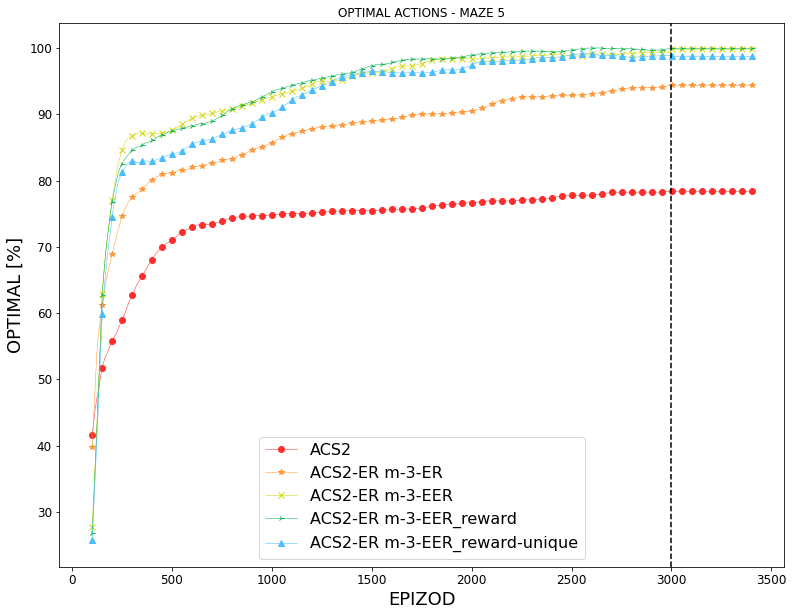

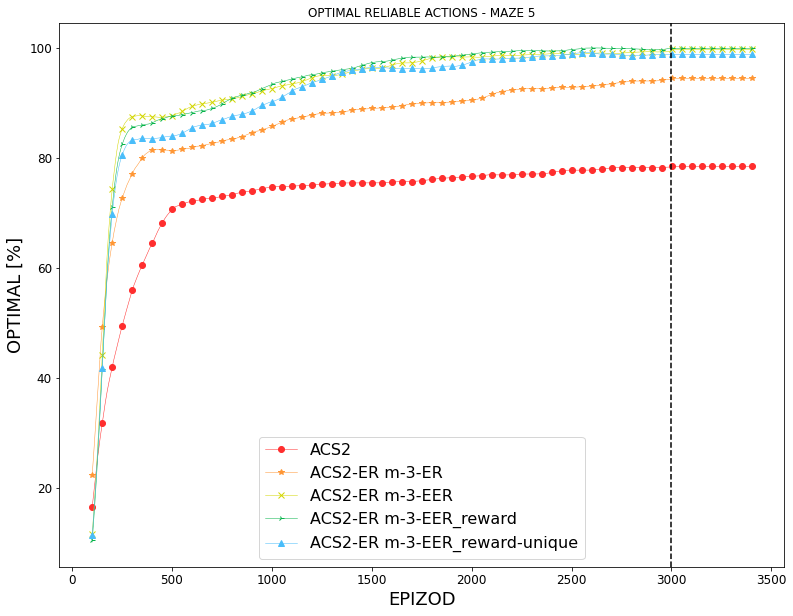

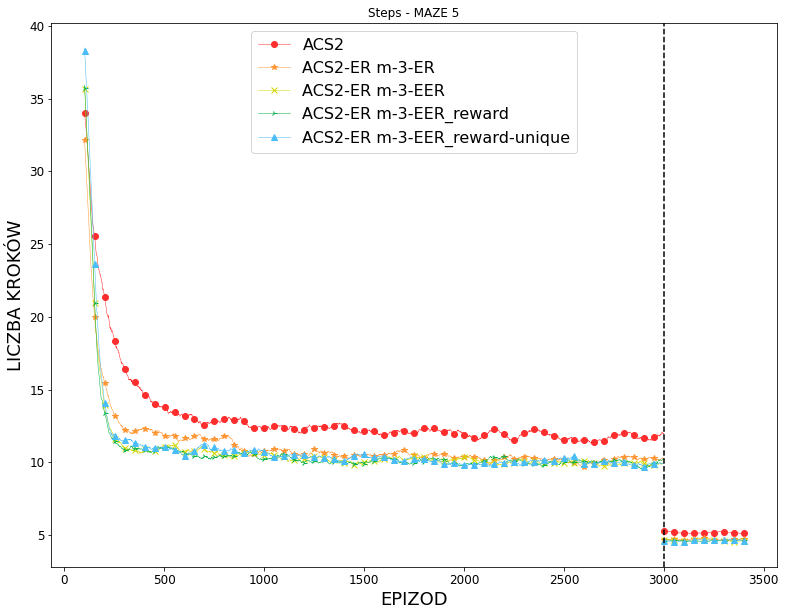

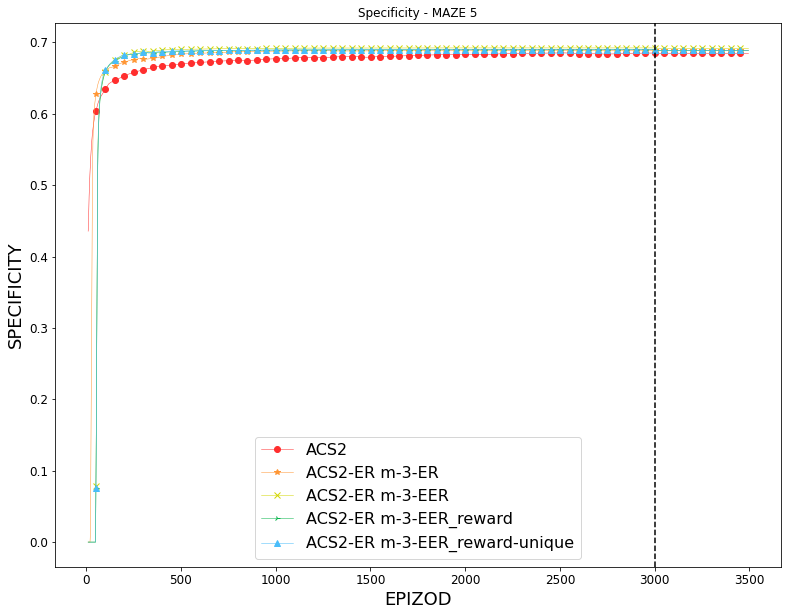

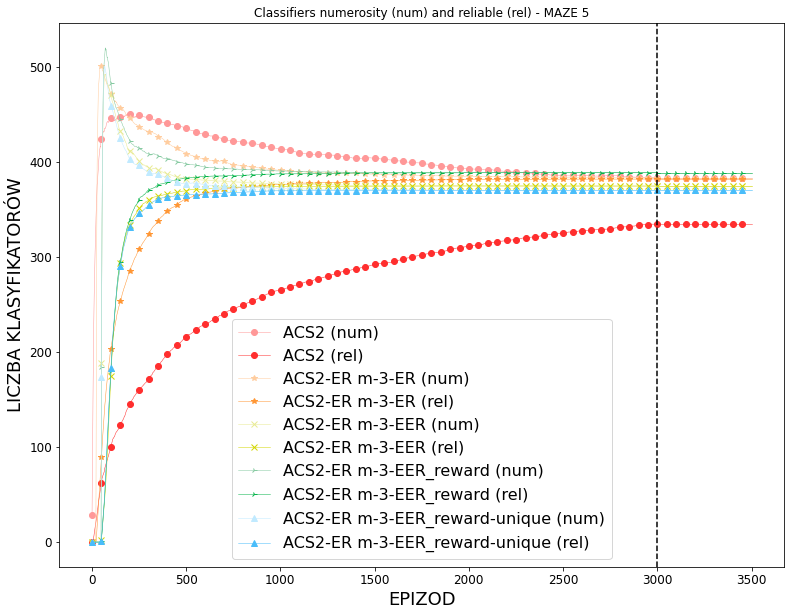

In [5]:
analyzer.plot_knowledge(width=0.5)
analyzer.plot_optimal(width=0.5, exploit_avg_win=100, explore_avg_win=100)
analyzer.plot_optimal_reliable(width=0.5, exploit_avg_win=100, explore_avg_win=100)
analyzer.plot_steps(exploit_avg_win=100, explore_avg_win=100, width=0.5)
# analyzer.plot_avg_steps(exploit_avg_win=10, explore_avg_win=10, width=0.5)
analyzer.plot_specificity(exploit_avg_win=10, explore_avg_win=10, width=0.5)
analyzer.plot_classifiers(width=0.5)

In [6]:
analyzer.compare_knowledge_above_threshold_welch_test(95)  # all 30 observations used
analyzer.compare_steps_average_welch_test(0, 5000) # all 30 observations used

                               ACS2-ER m--1        ACS2-ER m-3-ER     ACS2-ER m-3-EER     ACS2-ER m-3-EER_reward    ACS2-ER m-3-EER_reward-unique
-----------------------------  ------------------  -----------------  ------------------  ------------------------  -------------------------------
ACS2-ER m--1                   s: 0.0, p: 1.0      s: 38.609, p: 0.0  s: 48.401, p: 0.0   s: 46.997, p: 0.0         s: 47.225, p: 0.0
ACS2-ER m-3-ER                 s: -38.609, p: 0.0  s: 0.0, p: 1.0     s: 9.665, p: 0.0    s: 7.847, p: 0.0          s: 8.888, p: 0.0
ACS2-ER m-3-EER                s: -48.401, p: 0.0  s: -9.665, p: 0.0  s: 0.0, p: 1.0      s: -3.201, p: 0.004       s: -0.075, p: 0.941
ACS2-ER m-3-EER_reward         s: -46.997, p: 0.0  s: -7.847, p: 0.0  s: 3.201, p: 0.004  s: 0.0, p: 1.0            s: 2.303, p: 0.031
ACS2-ER m-3-EER_reward-unique  s: -47.225, p: 0.0  s: -8.888, p: 0.0  s: 0.075, p: 0.941  s: -2.303, p: 0.031       s: 0.0, p: 1.0
                               ACS2-E